<a href="https://colab.research.google.com/github/MatysLab/Neural_Network_Notebook/blob/main/GrayScale_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#Importing tensorflow
import tensorflow as tf
from tensorflow import keras

#Import tool
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist # Load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Split data into testing and training

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In our dataset we have 60,000 picture that are 28x28 pixels. They are on grey scale so 0 is BLACK and 255 White. 0 - 255

In [6]:
train_images.shape

(60000, 28, 28)

Get the value of a pixel [0, 23, 23] (Image: 0, Pixel colum: 23, Pixel row: 23]

In [7]:
train_images[0, 23, 23]

np.uint8(194)

Label are from 0-9 so 10 different. Each represent a clothing brand/

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

What does the images look like

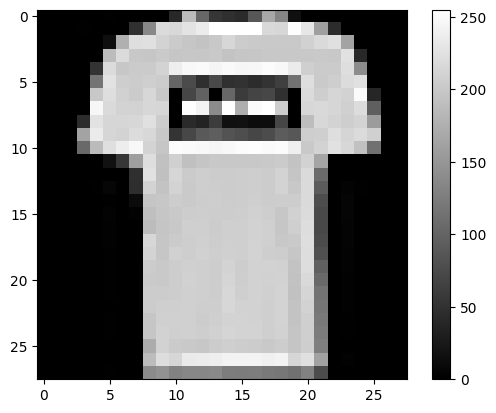

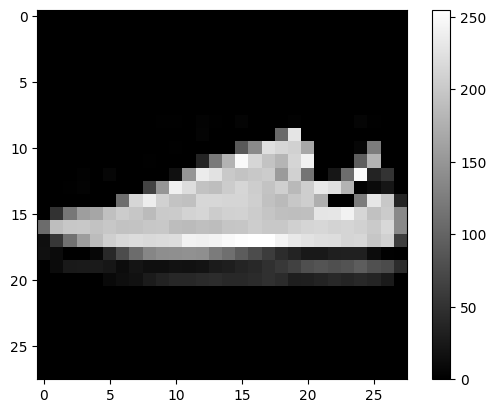

In [15]:
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(train_images[6], cmap='gray')
plt.colorbar()
plt.show()

Turn value of the picture to be between 0 and 1 since we currently have a matrix of 0 to 255 23x23 pixels. We set it to divided by 255.0 since we want a float 0-1

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Take all the pixels data and flatten then out
    keras.layers.Dense(128, activation='relu'), #Hidden layer number of hidden neuron and type of activation
    keras.layers.Dense(10, activation='softmax') #10 comes from the number of different ouput type class

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8645 - loss: 0.3803


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.4100
Test accuracy: 0.8511000275611877


In [30]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
9


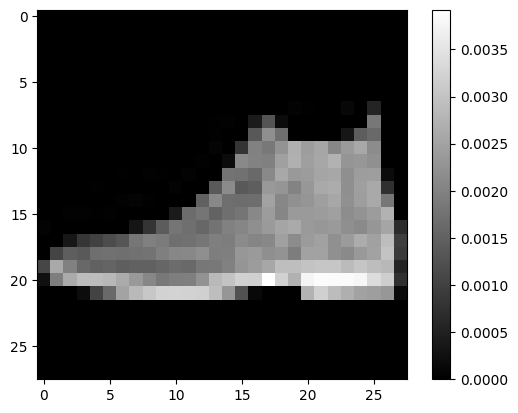

In [31]:
plt.figure()
plt.imshow(test_images[0], cmap='gray')
plt.colorbar()
plt.show()